Data Science CoderHouse 60905

Alumno: Nicolas Ploskinos

**Introducción:**
El mundo del deporte genera una enorme cantidad de datos que pueden ser aprovechados para analizar el rendimiento de los equipos y jugadores. Este dataset contiene información detallada sobre jugadores de la NBA, incluyendo estadísticas de juego, datos personales y detalles de la carrera deportiva. Este dataset es usado por analistas y aficionados al baloncesto que desean profundizar en el rendimiento de los jugadores y entender mejor los factores que influyen en su éxito en la cancha.

**Descripción del Problema:**
El análisis de datos en el ámbito deportivo es fundamental para tomar decisiones informadas en la gestión de equipos, la selección de jugadores y el diseño de estrategias de juego. Sin embargo, manejar y analizar grandes volúmenes de datos de manera efectiva puede resultar desafiante. El problema está en cómo extraer información valiosa y significativa de estos datos para mejorar el rendimiento individual y colectivo de los equipos de la NBA. Además, la identificación de patrones y tendencias ocultas en los datos puede ayudar a predecir el rendimiento futuro de los jugadores y anticipar posibles lesiones.

**Objetivo:**
El objetivo principal de este análisis es explorar el conjunto de datos de la NBA y utilizar técnicas de análisis de datos para obtener información significativa y útil. Esto incluye identificar patrones en el rendimiento de los jugadores, analizar la relacion entre diferentes variables y construir modelos para predecir el rendimiento de los jugadores en base a sus estadisticas y características individuales. Además, se busca proporcionar datos que puedan ser utilizados por entrenadores, directores técnicos y gerentes de equipos para tomar decisiones estratégicas informadas y mejorar el rendimiento general del equipo. En resumen, el objetivo es convertir datos en acciones tangibles que beneficien tanto a los equipos como a los jugadores en la NBA.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("Dataset_Nba.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  int64  
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

In [ ]:
df.describe()

Unnamed: 0           age  player_height  player_weight            gp  \
count  12844.000000  12844.000000   12844.000000   12844.000000  12844.000000   
mean    6421.500000     27.045313     200.555097     100.263279     51.154158   
std     3707.887763      4.339211       9.111090      12.426628     25.084904   
min        0.000000     18.000000     160.020000      60.327736      1.000000   
25%     3210.750000     24.000000     193.040000      90.718400     31.000000   
50%     6421.500000     26.000000     200.660000      99.790240     57.000000   
75%     9632.250000     30.000000     208.280000     108.862080     73.000000   
max    12843.000000     44.000000     231.140000     163.293120     85.000000   

                pts           reb           ast    net_rating      oreb_pct  \
count  12844.000000  12844.000000  12844.000000  12844.000000  12844.000000   
mean       8.212582      3.558486      1.824681     -2.226339      0.054073   
std        6.016573      2.477885      1.800840     12.665124      0.043335   
min        0.000000      0.000000      0.000000   -250.000000      0.000000   
25%        3.600000      1.800000      0.600000     -6.400000      0.021000   
50%        6.700000      3.000000      1.200000     -1.300000      0.040000   
75%       11.500000      4.700000      2.400000      3.200000      0.083000   
max       36.100000     16.300000     11.700000    300.000000      1.000000   

           dreb_pct       usg_pct        ts_pct       ast_pct  
count  12844.000000  12844.000000  12844.000000  12844.000000  
mean       0.140646      0.184641      0.513138      0.131595  
std        0.062513      0.053545      0.101724      0.094172  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.096000      0.149000      0.482000      0.066000  
50%        0.130500      0.181000      0.525000      0.103000  
75%        0.179000      0.217000      0.563000      0.179000  
max        1.000000      1.000000      1.500000      1.000000

Hipotesis planteadas:

1) El aumento de puntos por partido de los jugadores

2) El aumento de jugadores extranjeros en la NBA

3) El aumento de jugadores no drafteados

4) La disminucion en la cantidad de jugadores que juegan todos los partidos


Aumento de puntos por partido

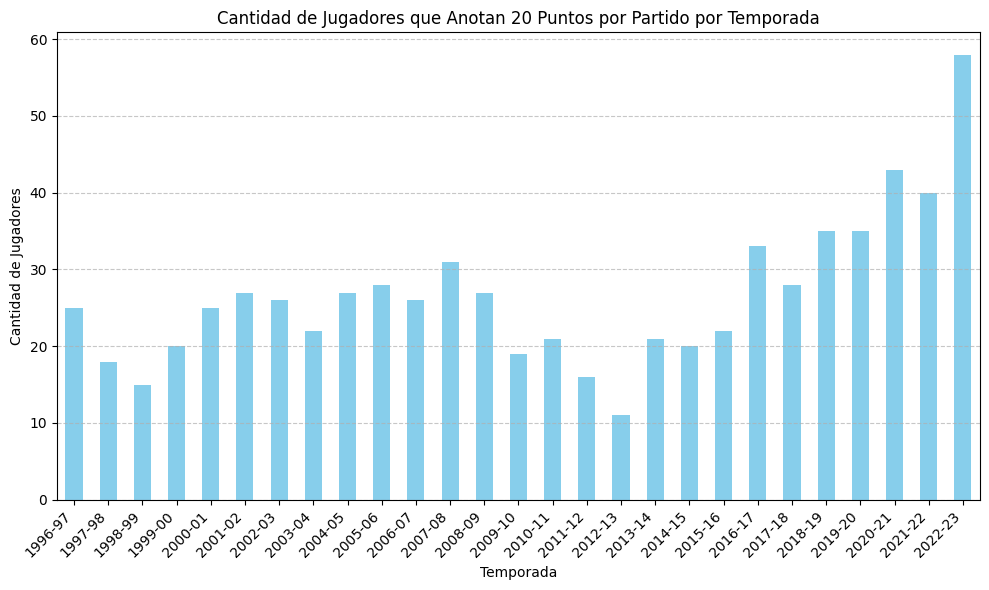

In [ ]:
jugadores_20_puntos = df[df['pts'] >= 20]
cantidad_jugadores_20_puntos_por_temporada = jugadores_20_puntos.groupby('season').size()

plt.figure(figsize=(10, 6))
cantidad_jugadores_20_puntos_por_temporada.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Jugadores que Anotan 20 Puntos por Partido por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Cantidad de Jugadores')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Aqui se ve como claramente hay una tendencia de los jugadores a anotar mas puntos, especialmente aquellos que son estrellas.
Tambien hay excepciones como la temporada 2012-2013 en donde hubo pocos jugadores que superaron los 20 puntos de promedio por partido.

Aumento de jugadores extranjeros

<ipython-input-59-4c91c737b821>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='Cantidad de Jugadores', data=jugadores_no_usa_por_temporada, palette='Set2')


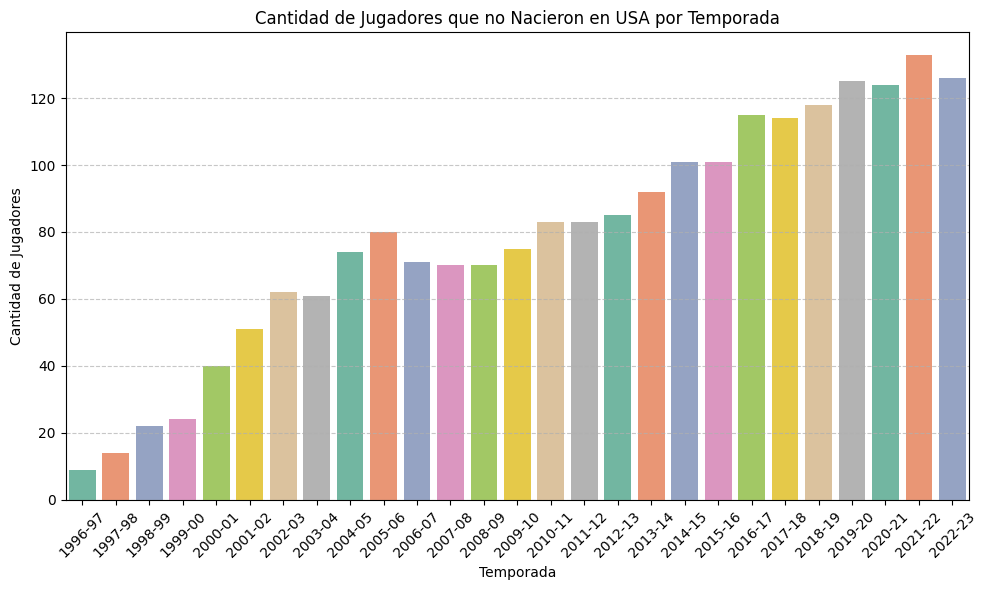

In [ ]:

import seaborn as sns

jugadores_no_usa = df[df['country'] != 'USA']

jugadores_no_usa_por_temporada = jugadores_no_usa.groupby('season').size().reset_index(name='Cantidad de Jugadores')

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='Cantidad de Jugadores', data=jugadores_no_usa_por_temporada, palette='Set2')
plt.title('Cantidad de Jugadores que no Nacieron en USA por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Cantidad de Jugadores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Aqui se ve como hay una tendencia hacia mas jugadores no nacidos en USA en la NBA.

Aumento de jugadores undrafted

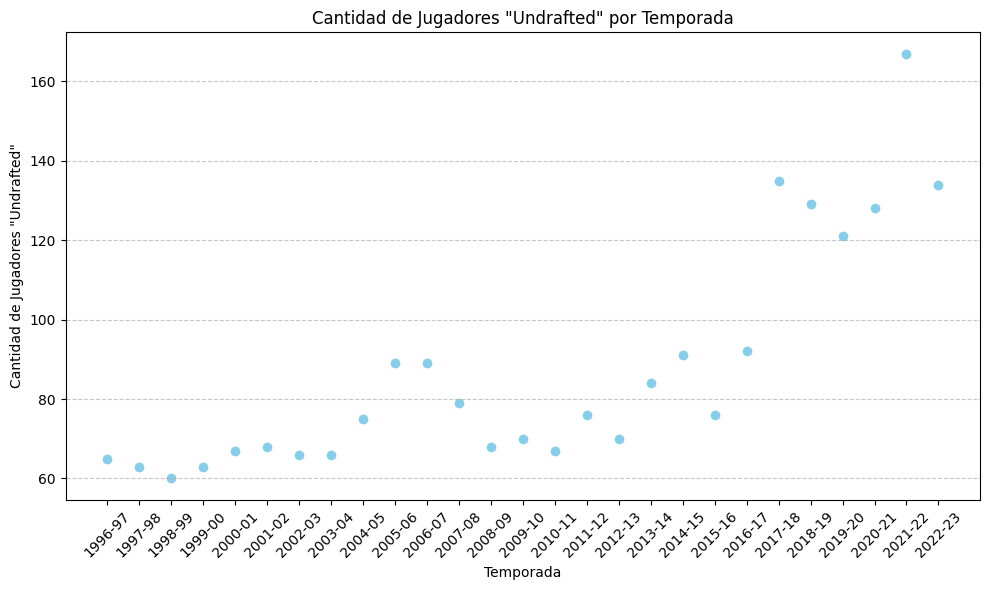

In [ ]:

jugadores_undrafted = df[df['draft_year'] == 'Undrafted']
jugadores_undrafted_por_temporada = jugadores_undrafted.groupby('season').size()

plt.figure(figsize=(10, 6))
plt.scatter(jugadores_undrafted_por_temporada.index, jugadores_undrafted_por_temporada.values, color='skyblue')
plt.title('Cantidad de Jugadores "Undrafted" por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Cantidad de Jugadores "Undrafted"')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

En este grafico se ve como hay una tendencia a haber cada vez mas jugadores que no son drafteados dentro de las 60 elecciones que ofrece el draft de la NBA por año

Disminucion de jugadores con 82 partidos jugados

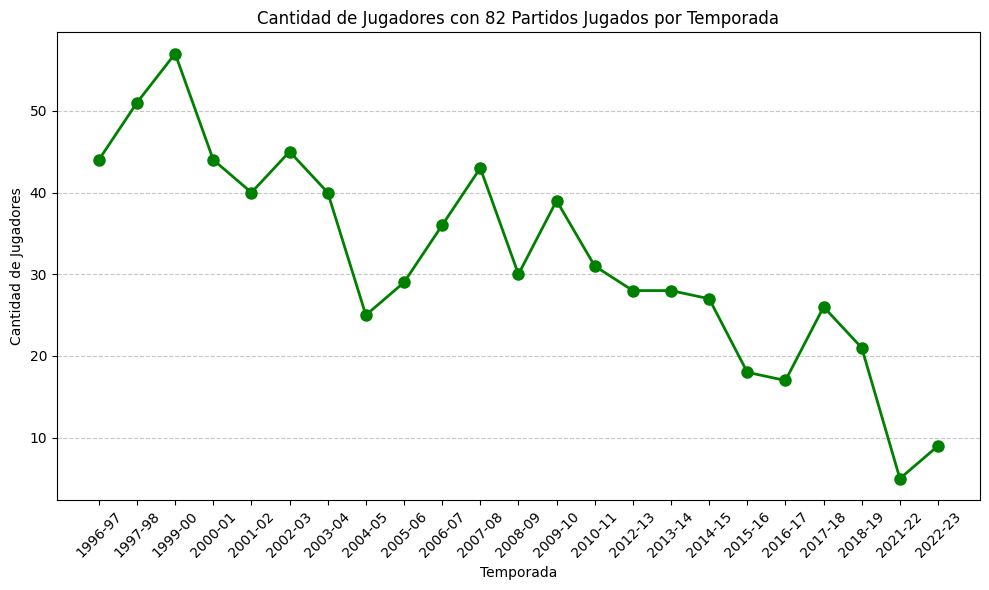

In [ ]:

jugadores_82_gp = df[df['gp'] == 82]
jugadores_82_gp_por_temporada = jugadores_82_gp.groupby('season').size()

plt.figure(figsize=(10, 6))
plt.plot(jugadores_82_gp_por_temporada.index, jugadores_82_gp_por_temporada.values, marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
plt.title('Cantidad de Jugadores con 82 Partidos Jugados por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Cantidad de Jugadores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Aqui se ve como por distintos motivos ya sea lesiones o descanso hay cada vez menos jugadores que estan disponibles para jugar los 82 partidos de la temporada regular de la NBA.

In [ ]:
# Identificar valores faltantes
missing_values = df.isnull().sum()
print('Valores faltantes por columna:')
print(missing_values)

# Tratar valores faltantes

# 1. Eliminar filas con valores faltantes
df_cleaned = df.dropna()
print('DataFrame sin filas con valores faltantes:')
print(df_cleaned.head())

# 2. Rellenar valores faltantes con la media de la columna (para columnas numéricas)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

print('DataFrame con valores faltantes rellenados con la media:')
print(df.head())

# 3. Rellenar valores faltantes con un valor específico (para columnas categóricas)
df.fillna('Desconocido', inplace=True)
print('DataFrame con valores faltantes rellenados con "Desconocido":')
print(df.head())

# Guardar el DataFrame tratado en un nuevo archivo CSV
df.to_csv('dataset_nba.csv', index=False)

Valores faltantes por columna:
Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64
DataFrame sin filas con valores faltantes:
   Unnamed: 0       player_name team_abbreviation  age  player_height  \
0           0  Randy Livingston               HOU   22         193.04   
1           1  Gaylon Nickerson               WAS   28         190.50   
2           2      George Lynch               VAN   26         203.20   
3           3    George McCloud               LAL

Aqui se pueden identificar y tratar valores faltantes en columnas relevantes

In [ ]:
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Aplicar one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Mostrar el DataFrame transformado
print("Datos después de one-hot encoding:")
print(df_encoded.head())

# Guardar el DataFrame transformado en un nuevo archivo CSV
df_encoded.to_csv('dataset_encoded.csv', index=False)

Datos después de one-hot encoding:
   Unnamed: 0  age  player_height  player_weight  gp   pts  reb  ast  \
0           0   22         193.04      94.800728  64   3.9  1.5  2.4   
1           1   28         190.50      86.182480   4   3.8  1.3  0.3   
2           2   26         203.20     103.418976  41   8.3  6.4  1.9   
3           3   30         203.20     102.058200  64  10.2  2.8  1.7   
4           4   23         213.36     119.748288  52   2.8  1.7  0.3   

   net_rating  oreb_pct  ...  season_2013-14  season_2014-15  season_2015-16  \
0         0.3     0.042  ...           False           False           False   
1         8.9     0.030  ...           False           False           False   
2        -8.2     0.106  ...           False           False           False   
3        -2.7     0.027  ...           False           False           False   
4       -14.1     0.102  ...           False           False           False   

   season_2016-17  season_2017-18  season_2018-19  

Aqui se convirtieron las variables categoricas en formato numerico por one-hot encoding.

In [ ]:
import pandas as pd

# Seleccionar solamente las columnas con puntos, rebotes y asistencias
selected_columns = ['pts', 'reb', 'ast']
df_selected = df[selected_columns]

# Mostrar el nuevo DataFrame con las columnas seleccionadas
print(df_selected)

        pts   reb  ast
0       3.9   1.5  2.4
1       3.8   1.3  0.3
2       8.3   6.4  1.9
3      10.2   2.8  1.7
4       2.8   1.7  0.3
...     ...   ...  ...
12839  33.1  10.2  4.2
12840   2.4   0.9  0.6
12841  13.1   6.5  1.2
12842   3.4   4.7  0.5
12843   6.4   3.6  0.9

[12844 rows x 3 columns]


pts    0
reb    0
ast    0
dtype: int64


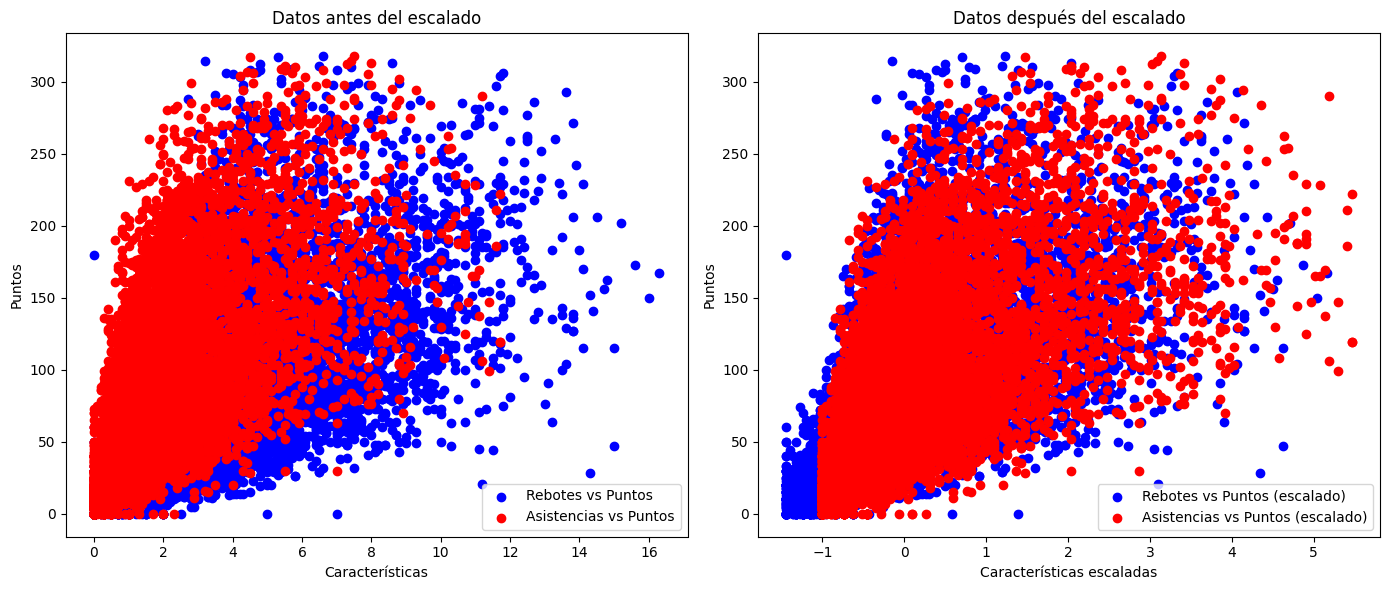

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Verificar valores nulos
print(df.isnull().sum())

# Llenar valores nulos (si existen) con la media de la columna
df.fillna(df.mean(), inplace=True)

# Dividir los datos en características (X) y etiquetas (y)
# Supongamos que la etiqueta es 'PTS' (por ejemplo, estamos prediciendo puntos)
X = df_selected.drop('pts', axis=1)
y = df_selected['pts']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Graficar los datos antes del escalado
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train['reb'], y_train, color='blue', label='Rebotes vs Puntos')
plt.scatter(X_train['ast'], y_train, color='red', label='Asistencias vs Puntos')
plt.xlabel('Características')
plt.ylabel('Puntos')
plt.title('Datos antes del escalado')
plt.legend()

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrame para facilitar el grafico
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=['reb', 'ast'])

# Graficar los datos después del escalado
plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled_df['reb'], y_train, color='blue', label='Rebotes vs Puntos (escalado)')
plt.scatter(X_train_scaled_df['ast'], y_train, color='red', label='Asistencias vs Puntos (escalado)')
plt.xlabel('Características escaladas')
plt.ylabel('Puntos')
plt.title('Datos después del escalado')
plt.legend()

plt.tight_layout()
plt.show()

En estos graficos se puede la relacion entre las estadisticas que consideramos importantes (puntos, rebotes, asistencias) en un garfico normal y en otro escalado

Regresion logistica Resultados:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC: 1.0
Matriz:
[[1275    0]
 [   0 1294]]

Random Forest Resultados:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC: 1.0
Matriz:
[[1275    0]
 [   0 1294]]

SVM Resultados:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC: 1.0
Matriz:
[[1275    0]
 [   0 1294]]



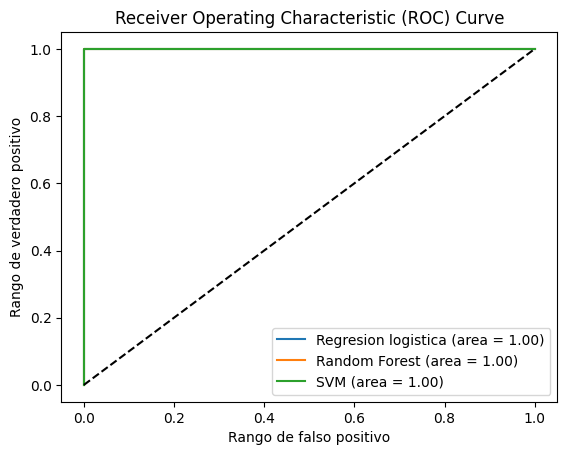

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Verificar y llenar valores nulos
df.fillna(df.mean(), inplace=True)

# Asumamos que 'PTS' es la etiqueta binaria (0 o 1)
# Aquí simplemente conversimos 'PTS' a una variable binaria como ejemplo
# Esto debe ser ajustado a la variable correcta de tu dataset
df['pts'] = (df['pts'] > df['pts'].median()).astype(int)

# Seleccionar las columnas con puntos, rebotes y asistencias
selected_columns = ['pts', 'reb', 'ast']
df_selected = df[selected_columns]

# Dividir los datos en características (X) y etiquetas (y)
X = df_selected.drop('ast', axis=1)
y = df_selected['pts']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar y entrenar diferentes modelos de clasificación
models = {
    "Regresion logistica": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc,
        "Matriz": confusion_matrix(y_test, y_pred)
    }

    # Imprimir resultados
    print(f"{model_name} Resultados:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print(f"Matriz:\n{results[model_name]['Matriz']}\n")

    # Graficar la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

# Finalizar la gráfica de ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Rango de falso positivo')
plt.ylabel('Rango de verdadero positivo')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Aqui podemos ver la prpyeccion de los algoritmos de los algoritmos de clasificacion: regresion logistica, random forest y SMV y sus resultados

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Verificar y llenar valores nulos
df.fillna(df.mean(), inplace=True)

# Asumamos que 'PTS' es la etiqueta binaria (0 o 1)
# Aquí simplemente convertimos 'PTS' a una variable binaria como ejemplo
# Esto debe ser ajustado a la variable correcta de tu dataset
df['pts'] = (df['pts'] > df['pts'].median()).astype(int)

# Seleccionar las columnas con puntos, rebotes y asistencias
selected_columns = ['pts', 'reb', 'ast']
df_selected = df[selected_columns]

# Dividir los datos en características (X) y etiquetas (y)
X = df_selected.drop('pts', axis=1)
y = df_selected['pts']

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inicializar modelos de clasificación
models = {
    "Regresion logstica": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

# Realizar validación cruzada para cada modelo
for model_name, model in models.items():
    print(f"{model_name} Resultados de la validacion cruzada:")
    scores_accuracy = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    scores_precision = cross_val_score(model, X_scaled, y, cv=5, scoring='precision')
    scores_recall = cross_val_score(model, X_scaled, y, cv=5, scoring='recall')
    scores_f1 = cross_val_score(model, X_scaled, y, cv=5, scoring='f1')
    scores_roc_auc = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')

    print(f"Accuracy: {np.mean(scores_accuracy):.2f} (+/- {np.std(scores_accuracy):.2f})")
    print(f"Precision: {np.mean(scores_precision):.2f} (+/- {np.std(scores_precision):.2f})")
    print(f"Recall: {np.mean(scores_recall):.2f} (+/- {np.std(scores_recall):.2f})")
    print(f"F1-score: {np.mean(scores_f1):.2f} (+/- {np.std(scores_f1):.2f})")
    print(f"ROC-AUC: {np.mean(scores_roc_auc):.2f} (+/- {np.std(scores_roc_auc):.2f})")
    print("\n")

Regresion logstica Resultados de la validacion cruzada:
Accuracy: 0.85 (+/- 0.01)
Precision: 0.86 (+/- 0.00)
Recall: 0.82 (+/- 0.03)
F1-score: 0.84 (+/- 0.01)
ROC-AUC: 0.93 (+/- 0.01)


Random Forest Resultados de la validacion cruzada:
Accuracy: 0.84 (+/- 0.01)
Precision: 0.84 (+/- 0.01)
Recall: 0.83 (+/- 0.02)
F1-score: 0.84 (+/- 0.01)
ROC-AUC: 0.92 (+/- 0.01)


SVM Resultados de la validacion cruzada:
Accuracy: 0.87 (+/- 0.01)
Precision: 0.86 (+/- 0.01)
Recall: 0.88 (+/- 0.02)
F1-score: 0.87 (+/- 0.01)
ROC-AUC: 0.93 (+/- 0.01)




Aqui realizamos la validacion cruzada de cada uno de los algoritmos mostrados anteriormente en el cual podemos ver sus resultados con su margen de error

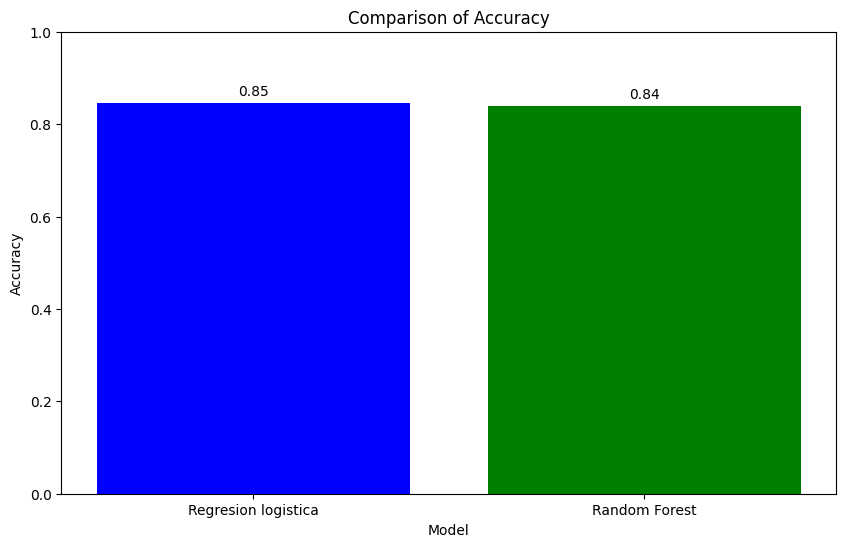

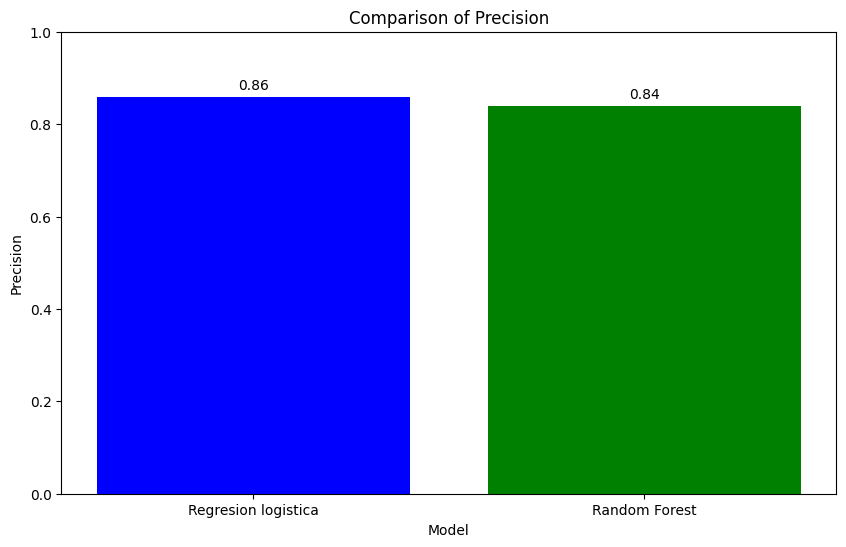

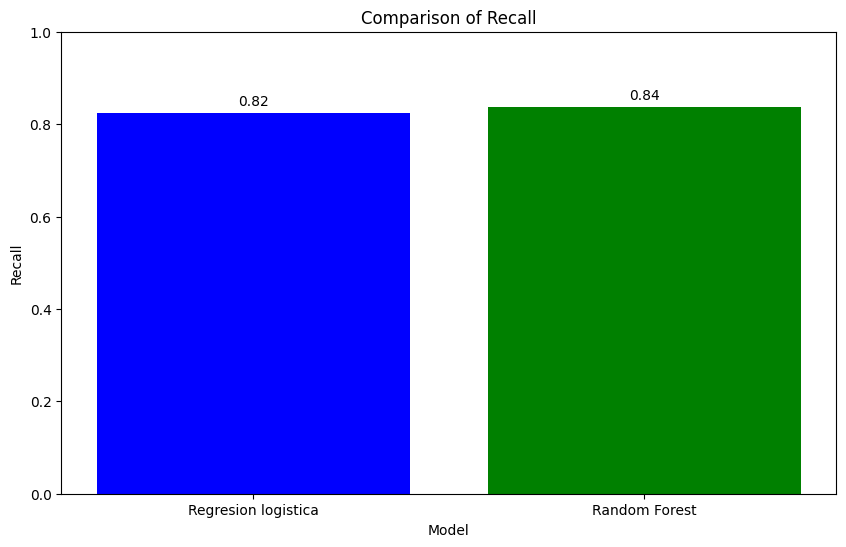

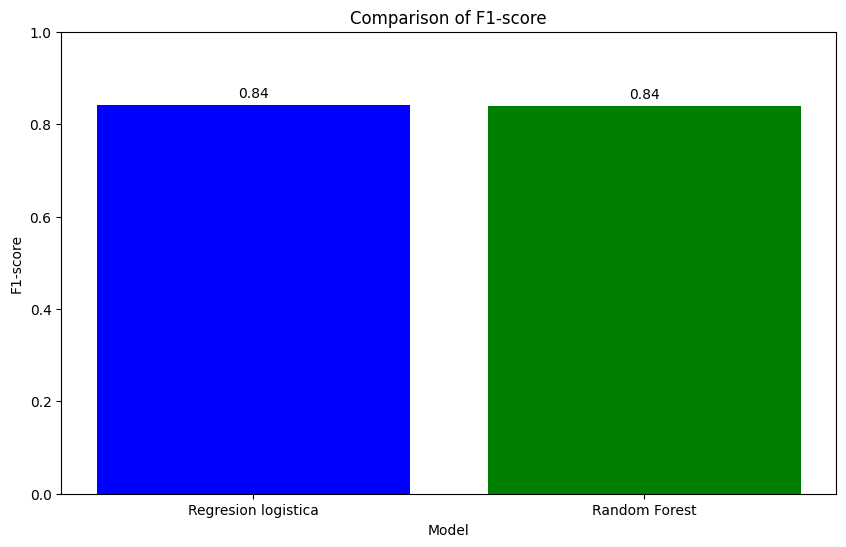

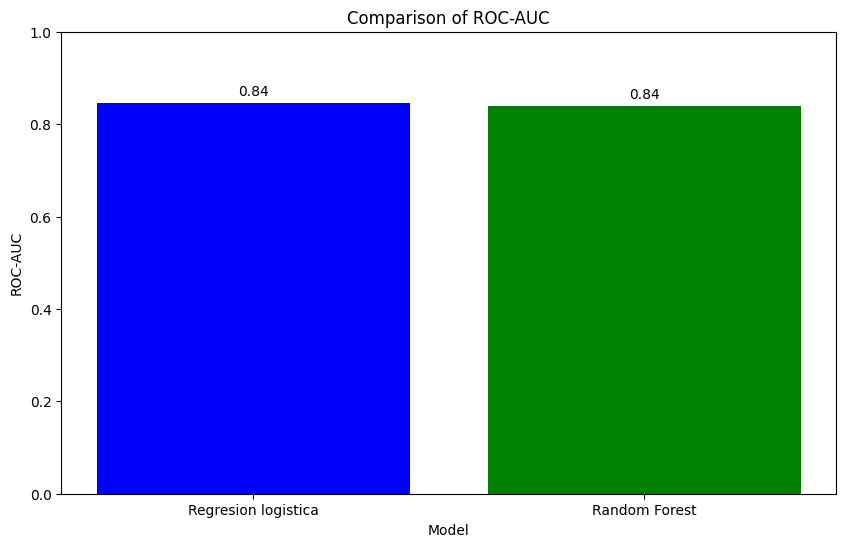

El mejor modelo es: Regresion logistica con una F1-score de 0.84
El mejor modelo es: Regresion logistica con una F1-score de 0.84


LogisticRegression()

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
model_names = list(model_scores.keys())

for metric in metrics:
    values = [model_scores[model][metric] for model in model_names]
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, values, color=['blue', 'green', 'red'])
    plt.title(f'Comparison of {metric}')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    for i, v in enumerate(values):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
    plt.show()

# Selección del modelo final basado en F1-score
best_model_name = max(model_scores, key=lambda k: model_scores[k]['F1-score'])
best_model = models[best_model_name]
print(f"El mejor modelo es: {best_model_name} con una F1-score de {model_scores[best_model_name]['F1-score']:.2f}")

# Entrenar el mejor modelo en todos los datos
best_model.fit(X_scaled, y)

# Selección del modelo final basado en F1-score
best_model_name = max(model_scores, key=lambda k: model_scores[k]['F1-score'])
best_model = models[best_model_name]
print(f"El mejor modelo es: {best_model_name} con una F1-score de {model_scores[best_model_name]['F1-score']:.2f}")

# Entrenar el mejor modelo en todos los datos
best_model.fit(X_scaled, y)

Aqui comparamos los modelos para ver cual era mejor para lo que estamos buscando que es poder predecir datos acerca de las tendencias de los jugadores de la nba.

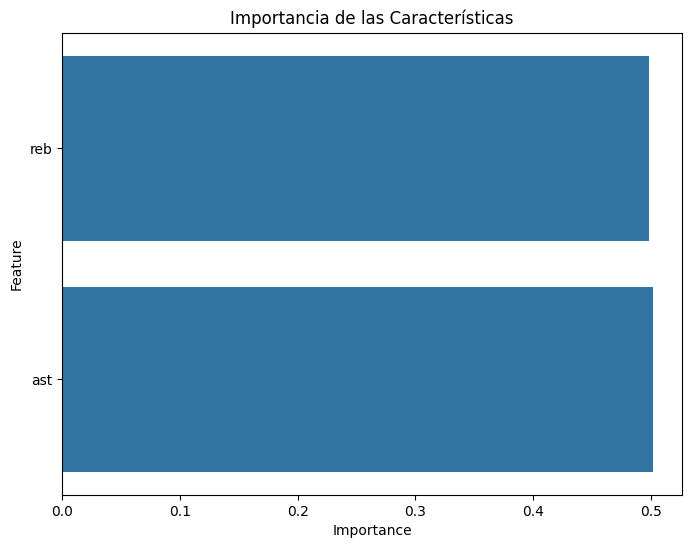

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.418625 to fit



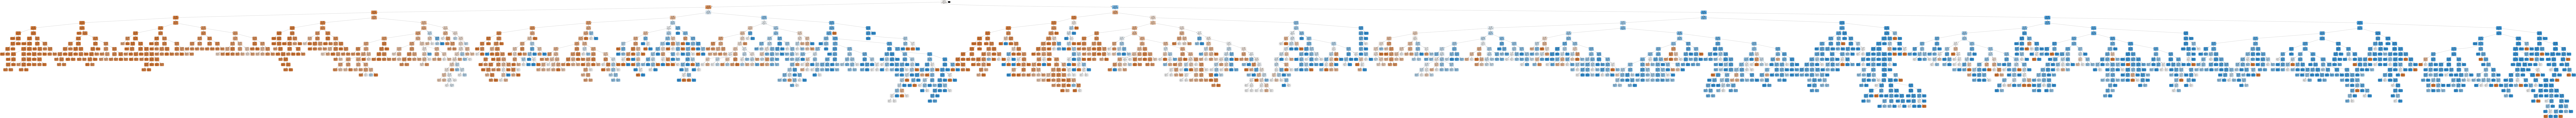

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import seaborn as sns
from io import StringIO
import pydotplus
from IPython.display import Image


# Asumamos que 'PTS' es la etiqueta binaria (0 o 1)
# Convertimos 'PTS' a una variable binaria como ejemplo (esto debe ser ajustado según tu dataset)
df['pts'] = (df['pts'] > df['pts'].median()).astype(int)

# Seleccionar las columnas con puntos, rebotes y asistencias
selected_columns = ['pts', 'reb', 'ast']
df_selected = df[selected_columns]

# Dividir los datos en características (X) y etiquetas (y)
X = df_selected.drop('pts', axis=1)
y = df_selected['pts']

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Bosque Aleatorio
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Importancia de las características
feature_importances = rf_model.feature_importances_
features = ['reb', 'ast']
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Visualización de la importancia de las características
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características')
plt.show()

# Entrenar un modelo de Árbol de Decisión para la visualización
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Visualización del Árbol de Decisión
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,
                feature_names=features,
                class_names=['0', '1'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Aqui podemos visualizar el modelo mediante un arbol de desicion.

Matriz de Confusión:
[[1088  187]
 [ 207 1087]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1275
           1       0.85      0.84      0.85      1294

    accuracy                           0.85      2569
   macro avg       0.85      0.85      0.85      2569
weighted avg       0.85      0.85      0.85      2569



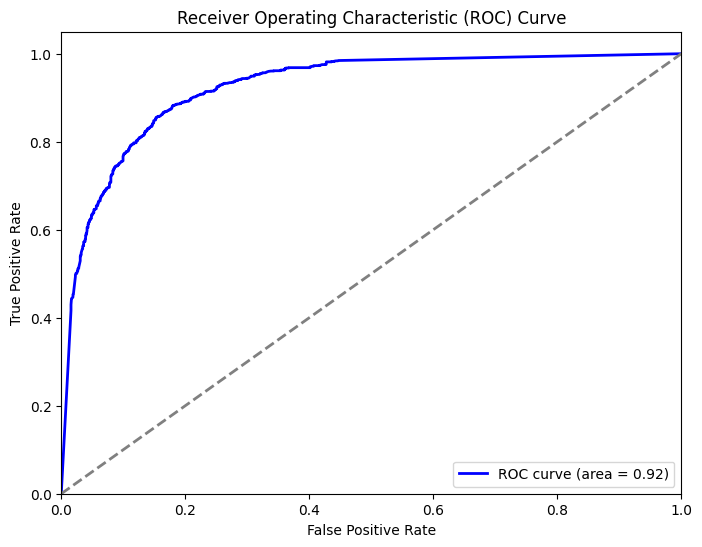

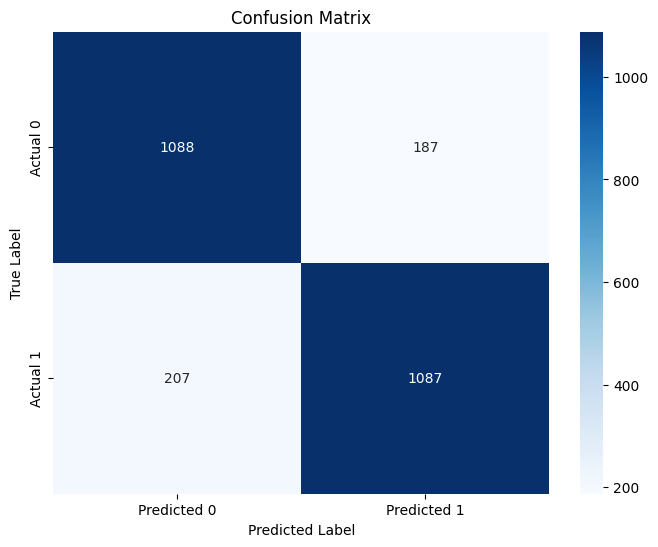

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay

df['pts'] = (df['pts'] > df['pts'].median()).astype(int)
selected_columns = ['pts', 'reb', 'ast']
df_selected = df[selected_columns]
X = df_selected.drop('pts', axis=1)
y = df_selected['pts']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred)
print("\nReporte de Clasificación:")
print(class_report)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rango falso positivo')
plt.ylabel('Rango falso negativo')
plt.title('(ROC) curva')
plt.legend(loc="lower right")
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de confusion')
plt.show()


**Conclusion:**

En general sobre el analisis podremos decir que se detectaron muchas tendencias muy marcadas acerca de como la nba esta cambiando constantemente y se ve cada vez mas por ejemplo: mas jugadores extranjeros que se destacan en comparasion con 25 años atras, como aumento la cantidad de puntos por partido que anotan los jugadores actualmente y la cantidad de jugadores que no pasan por el draft. Tambien se pudo ver una clara disminucion en la cantidad de jugadores que estan disponibles para jugar todos los partidos-


En el modelo seleccionamos las columnas con puntos por partido, asistencias por partido y rebotes por partido para poder hacer las predicciones y ver las tendencias de los jugadores en el futuro, tambien considere que son las estadisticas mas importantes que se proporcionan en el dataset.